# AI: Using data and solve problem
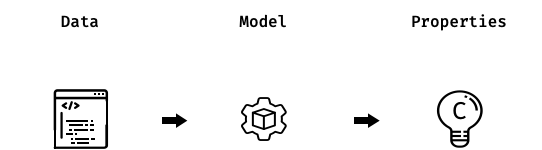
 * end -> end  : data end for training to prediction.
 
 ## Seven steps:
 * data collection -> data cleanshing -> select model -> training -> evaluation -> super parameters fixing -> prediction
 ### Modeling: 
 * classification : C4.5, Naive Bayes, SVM, KNN, Adaboost, CART
 * Clustering: K-Means, EM(expectation maximun)
 * Associate Analysis: Apriori, FP-growth
 * Webomatrix : PageRank (node modeling)
 * Learning rate : steps size to optimal value
 #### Housing prices Prediction
 (regression problem) 
 
 m = number of exmaples
 
 x = input  variable / features
 
 y = output variable / target
 
 Simple linear regression:
 $h_\theta(x)=\theta_0+\theta_1x$
 
 Multiple linear regression:
 \\[{{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [8]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="dark")
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
df.head(10)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


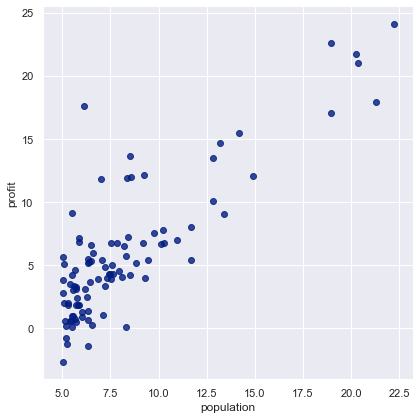

In [10]:
sns.lmplot('population', 'profit', df, size=6, fit_reg=False)
plt.show()

In [12]:
"""
basic knowledge: 
use concat to add intersect feature to avoid side effect
not efficient for big dataset though
"""
def get_X(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)  
    return data.iloc[:, :-1].as_matrix()

def get_y(df):
    '''assume the last column is the target'''
    return np.array(df.iloc[:, -1])

def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [14]:
#fix to tf2 : optimizer = tf.compat.v1.train.GradientDescentOptimizer
def linear_regression(X_data, y_data, alpha, epoch, optimizer = tf.compat.v1.train.GradientDescentOptimizer):# by Lucas Shen
      # placeholder for graph input
    X = tf.placeholder(tf.float32, shape=X_data.shape)
    y = tf.placeholder(tf.float32, shape=y_data.shape)

    # construct the graph
    with tf.variable_scope('linear-regression'):
        W = tf.get_variable("weights",
                            (X_data.shape[1], 1),
                            initializer=tf.constant_initializer())  # n*1

        y_pred = tf.matmul(X, W)  # m*n @ n*1 -> m*1

        loss = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)  # (m*1).T @ m*1 = 1*1

    opt = optimizer(learning_rate=alpha)
    opt_operation = opt.minimize(loss)

    # run the session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        loss_data = []

        for i in range(epoch):
            _, loss_val, W_val = sess.run([opt_operation, loss, W], feed_dict={X: X_data, y: y_data})
            loss_data.append(loss_val[0, 0])  # because every loss_val is 1*1 ndarray

            if len(loss_data) > 1 and np.abs(loss_data[-1] - loss_data[-2]) < 10 ** -9:  # early break when it's converged
                # print('Converged at epoch {}'.format(i))
                break

    # clear the graph
    tf.reset_default_graph()
    return {'loss': loss_data, 'parameters': W_val}  # just want to return in row vector format

## Recommandation system
- Content-based Filtering ( labeling content, compute similarity)
- Collaborative Filtering ( combine together with some coverd content) 
- in User based /  item based
### Target exploration
- advertisements
- webpage content 
- location ? restaurant? 

### MAB ( Multi-armed bandit problem) 
- Bussiness 

$$R_T=\sum_{i=1}^T (w_{opt}-w_{B(i)}) = Tw^* - \sum_{i=1}^T w_{B(i)}$$
- Bandit algorithms: Epsilon-Greedy, Thompson sampling, UCB(go), LinUCB 

### Target
- CTR click
- CVR buy 
- GPM GMV

# Thinking & Action：
### 1. Due to the content similarities are simple with frequently updating, why for collaborative filtering
- a. As we are trying to give personal recommendations to A, firstly, we will find the group G which have preferreable items which are not in A, then recommends to A. ( users based) .
- b. This method uses a rating system to predict the similarity of one item by taking into consideration a similar item, or the ‘neighbor’. (item based).
### 3. When labeling the video: 
- confused question   time series ? concactnating problem? 